In [ ]:
# pip install -r requirements.txt

In [1]:
## Imports
import os
from dotenv import load_dotenv
import pandas as pd

In [2]:
load_dotenv(override=True)

True

In [3]:
data = pd.read_csv("data/salaries.csv")
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
###### OPENAI #####
# from pandasai.llm.openai import OpenAI
# llm = OpenAI(api_token=os.environ["OPENAI_API_KEY"])
##llm = OpenAI()


###### OLLAMA #####
# from pandasai.llm import LangchainLLM
# from langchain_community.llms import Ollama
# # lang_llm = Ollama(model="mistral")
# lang_llm = Ollama(model="openchat:7b-v3.5-0106-q5_K_M")
# # lang_llm = Ollama(model="starcoder2:15b-q5_K_M")
# # lang_llm = Ollama(model="calebfahlgren/natural-functions:Q5_K_M")
# llm = LangchainLLM(lang_llm)


###### GROQ #####
from pandasai.llm import LangchainLLM
from langchain_groq.chat_models import ChatGroq
groq_model = ["mixtral-8x7b-32768", "llama2-70b-4096"]
lang_llm = ChatGroq(
    temperature=0,
    model_name=groq_model[1], 
    api_key = os.environ["GROQ_API_KEY"])
llm = LangchainLLM(lang_llm)


###### ANTHROPIC #####
# from pandasai.llm import LangchainLLM
# from langchain_anthropic.chat_models import ChatAnthropic
# lang_llm = ChatAnthropic(
#     temperature=0,
#     model_name="claude-3-opus-20240229", 
#     anthropic_api_key = os.environ["ANTHROPIC_API_KEY"])
# llm = LangchainLLM(lang_llm)

In [5]:
from pandasai import SmartDataframe
df = SmartDataframe(data, config={"llm": llm, "verbose": False})

In [6]:
response=df.chat("How many records are there?")
print(response)

3755


In [7]:
df.chat('Group average salary by job_title where company_location is US?')


,job_title,salary
0,AI Developer,200000.000000
1,AI Scientist,113428.571429
2,Analytics Engineer,159024.347826
3,Applied Data Scientist,238000.000000
4,Applied Machine Learning Engineer,130000.000000
...,...,...
65,Principal Machine Learning Engineer,190000.000000
66,Product Data Analyst,120000.000000
67,Research Engineer,168156.580645
68,Research Scientist,179146.206897


<Figure size 1000x800 with 0 Axes>

In [8]:
response=df.chat('What is the average salary in usd by job titles? Make sure the output is sorted in descending order.')
print(response)

/Users/mlim/Projects/mlim1972/llm-test/exports/charts/temp_chart.png


In [9]:
print(f"Code Generated\n{df.last_code_generated}\n")
print(f"Code Executed\n{df.last_code_executed}\n")

Code Generated
result = {'type': 'number', 'value': None}
us_salary_df = dfs[0].loc[(dfs[0]['company_location'] == 'US') & dfs[0]['job_title'].notnull(), ['job_title', 'salary']]
avg_salary_by_job_title = us_salary_df.groupby('job_title')['salary'].mean().reset_index()
avg_salary_by_job_title = avg_salary_by_job_title.sort_values(by='salary', ascending=False)
average_salary = avg_salary_by_job_title['salary'].sum() / len(avg_salary_by_job_title)
result['value'] = average_salary
plt.figure(figsize=(10, 6))
plt.barh(avg_salary_by_job_title['job_title'], avg_salary_by_job_title['salary'], color='b', edgecolor='black')
plt.xlabel('Average Salary (USD)')
plt.title('Average Salary by Job Title in US')
plt.savefig('/Users/mlim/Projects/mlim1972/llm-test/exports/charts/temp_chart.png')
plt.close()
result['type'] = 'plot'
result['value'] = '/Users/mlim/Projects/mlim1972/llm-test/exports/charts/temp_chart.png'

Code Executed
result = {'type': 'number', 'value': None}
us_salary_df = dfs[0].loc[(d

/Users/mlim/Projects/mlim1972/llm-test/exports/charts/temp_chart.png


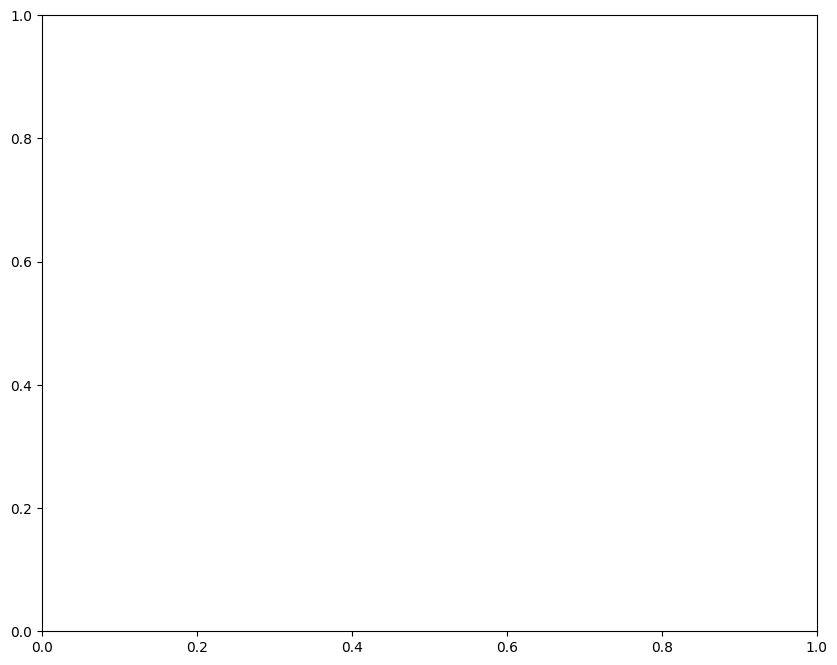

In [10]:
response=df.chat('Plot a bar chart showing top 10 job titles, using different colors for each bar')
print(response)

In [11]:
response=df.chat('Plot a bar chart showing average salary by experience level')
print(response)

/Users/mlim/Projects/mlim1972/llm-test/exports/charts/temp_chart.png


In [12]:
response=df.chat('Plot a pie chart showing the experience_level distribution')
print(response)

/Users/mlim/Projects/mlim1972/llm-test/exports/charts/temp_chart.png
